Sam Armstrong Assignment 1 CS545 

In [7]:
import numpy as np
import pandas

import matplotlib.pyplot as plt
%matplotlib inline

Download Data

In [38]:
# !curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
# !unzip -o AirQualityUCI.zip

Download A1 Grader

In [39]:
# !curl -O http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.zip
# !unzip -o A1grader.zip

Root Mean Square Error

In [1]:
def rmse(model, X, T, W):
    Y = model(X, W)
    return np.sqrt(np.mean((T - Y)**2))

Linear Model

In [2]:
def linear_model(X, W):
    return np.array(X) @ W[1:, :] + W[0,:]

Quadratic Model

In [3]:
def quadratic_model(X, W):
    return np.hstack((X, X**2)) @ W[1:, :] + W[0, :]

Cubic Model

In [4]:
def cubic_model(X, W):
    return np.hstack((X, X**2, X**3)) @ W[1:, :] + W[0, :]

Quartic Model

In [5]:
def quartic_model(X, W):
    return np.hstack((X, X**2, X**3, X**4)) @ W[1:, :] + W[0, :]

Linear Model Gradient

In [6]:
def linear_model_gradient(X, T, W):
    dEdY = -2 * (T - linear_model(X, W))
    all_but_bias = np.array(X)
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

[[-4.]
 [-8.]]


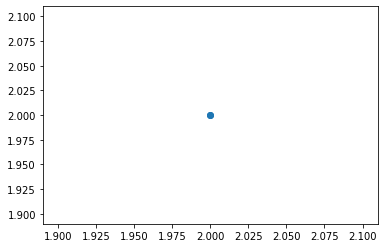

In [26]:
xx = np.array((1, 2)).reshape(-1, 1)
yy = np.array((2, 2)).reshape(-1, 1)
ww = np.zeros((2, 1))
ww = np.array((1, 0)).reshape(-1, 1)
linear_model(yy, ww)
print(linear_model_gradient(xx, yy, ww))
plt.plot(xx, yy, 'o');

Quadratic Model Gradient

In [46]:
def quadratic_model_gradient(X, T, W):
    dEdY = -2 * (T - quadratic_model(X, W))
    all_but_bias = np.hstack((X, X**2))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

Cubic Model Gradient

In [47]:
def cubic_model_gradient(X, T, W):
    dEdY = -2 * (T - cubic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

Quartic Model Gradient

In [48]:
def quartic_model_gradient(X, T, W):
    dEdY = -2 * (T - quartic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3, X**4))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

Gradient Descent Adam

In [49]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, n_steps):
    # Commonly used parameter values
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    
    for step in range(n_steps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= rho * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence

Format and Plot Data

X.shape = (7674, 1) Xnames = ['Hour']
T.shape = (7674, 1) Tnames = ['CO']


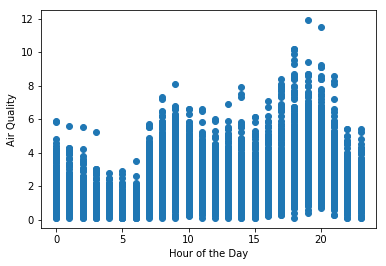

In [50]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',',
                        usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
# data = data[:46]  # only use the first 46 samples
data = data.dropna(axis=0)
    
hour = np.array([int(t[:2]) for t in data['Time']])
CO = np.array(data['CO(GT)'])

T = CO.reshape(-1, 1)
Tnames = ['CO']
X = hour.reshape(-1, 1)
Xnames = ['Hour']
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)
plt.ylabel("Air Quality")
plt.xlabel("Hour of the Day")
plt.plot(X, T, 'o');

Find Best Weights for the Linear Model

In [56]:
rhoAry = np.array((1.e-2, 1.e-3, 1.e-4, 1.e-5, 1.e-6, 1.e-7, 1.e-8, 1.e-9, 1.e-10))
error_linear_best = 1000
n_steps = 3000
for rho in rhoAry:
    W = np.zeros((2, 1))
    W, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W, rho, n_steps)
    print(np.sqrt(error_sequence[-1]))
    if(np.sqrt(error_sequence[-1]) < error_linear_best):
        W_best = W
        error_sequence_best = error_sequence
        W_sequence_best = W_sequence
        rho_linear_best = rho
        error_linear_best = np.sqrt(error_sequence[-1])

print(f'The lowest RMSE is {error_linear_best} for rho {rho_linear_best} at step {n_steps}')

1.1647985282595317
1.1655762782515922
1.2097008415897137
1.505002605694405
1.6005488853253906
1.6105058285489657
1.611504828239308
1.6116047605901767
1.6116147541484147
The lowest RMSE is 1.1647985282595317 for rho 0.01 at step 3000


Plot the Linear Model Results

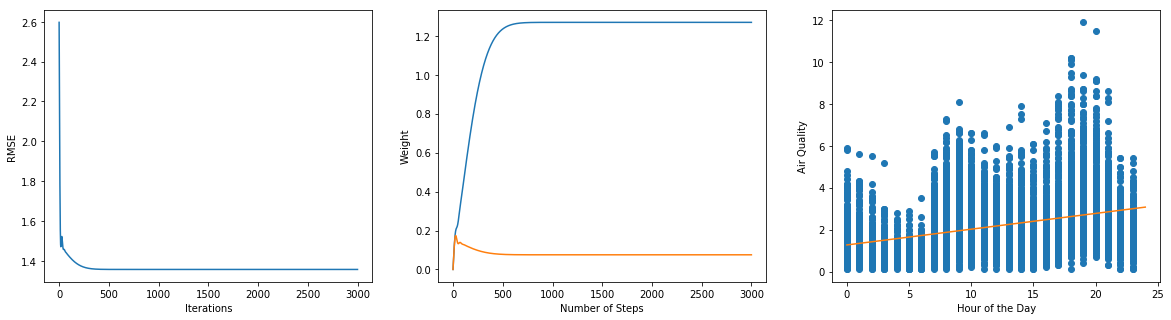

In [57]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence_best)
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.subplot(1, 3, 2)
plt.plot(W_sequence_best)
plt.xlabel("Number of Steps")
plt.ylabel("Weight")
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
plt.ylabel("Air Quality")
plt.xlabel("Hour of the Day")
xs = np.linspace(0, 24, 100).reshape(-1, 1)
plt.plot(xs, linear_model(xs, W_best));

<h2>Linear Model Discussion</h2>

The best learning rate value for the linear model is 0.01 with a RMSE of 1.1647985282595315. Since the linear model only has two weighted variables the gradient descent probably has less local minimums then the quadratic, cubic, and quartic models. Training it on the highest learning rate (0.01) yields the bests results and using a lower learning rate probably results in the gradient descent being too slow and not able to reach the same minimum in the same number of steps.

Find Best Weights for the Quadratic Model

In [58]:
error_quadratic_best = 1000
for rho in rhoAry:
    W = np.zeros((3, 1))
    W, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W, rho, n_steps)
    print(np.sqrt(error_sequence[-1]))
    if(np.sqrt(error_sequence[-1]) < error_quadratic_best):
        W_best = W
        error_sequence_best = error_sequence
        W_sequence_best = W_sequence
        rho_quadratic_best = rho
        error_quadratic_best = np.sqrt(error_sequence[-1])

print(f'The lowest RMSE is {error_quadratic_best} for rho {rho_quadratic_best} at step {n_steps}')

1.159188352026576
1.1593923004323725
1.1922993426912674
1.3114940210218782
1.4550484039132525
1.5937272647060796
1.6098093355620662
1.611435039626514
1.6115977803397332
The lowest RMSE is 1.159188352026576 for rho 0.01 at step 3000


Plot the Quadratic Model Results

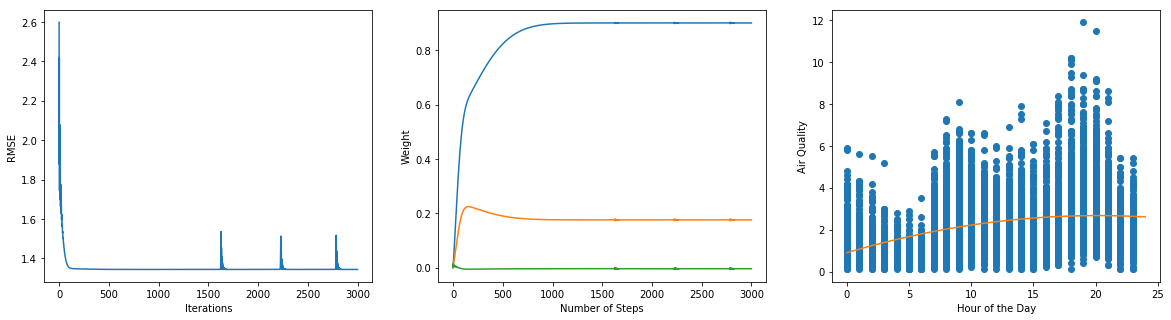

In [59]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence_best)
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.subplot(1, 3, 2)
plt.plot(W_sequence_best)
plt.xlabel("Number of Steps")
plt.ylabel("Weight")
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
plt.ylabel("Air Quality")
plt.xlabel("Hour of the Day")
xs = np.linspace(0, 24, 100).reshape(-1, 1)
plt.plot(xs, quadratic_model(xs, W_best));

<h2>Quadratic Model Discussion</h2>

The best learning rate value for the quadratic model is 0.01 with a RMSE of 1.1591889144427283. The quadratic model uses the same learning rate as the linear model but has a lower RMSE because a quadratic equation (curved line) can fit the same data more accuratly then a straight linear line. The likely reason the linear and quadratic models share the best learning rate of 0.01 is because they have similarly scaled gradient descents with a low number of local minimums they could get stuck in. Training it on the highest learning rate (0.01) yields the bests results and using a lower learning rate probably results in the gradient descent being too slow and not able to reach the same minimum in the same number of steps.

Find Best Weights for the Cubic Model

In [60]:
error_cubic_best = 1000
for rho in rhoAry:
    W = np.zeros((4, 1))
    W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, rho, n_steps)
    print(np.sqrt(error_sequence[-1]))
    if(np.sqrt(error_sequence[-1]) < error_cubic_best):
        W_best = W
        error_sequence_best = error_sequence
        W_sequence_best = W_sequence
        rho_cubic_best = rho
        error_cubic_best = np.sqrt(error_sequence[-1])

print(f'The lowest RMSE is {error_cubic_best} for rho {rho_cubic_best} at step {n_steps}')

1.148932511838929
1.150550411356479
1.1744986325254225
1.2191381179157386
1.3780988363368691
1.414576358843254
1.5805738034409114
1.6084194721184633
1.6112953396230698
The lowest RMSE is 1.148932511838929 for rho 0.01 at step 3000


Plot the Cubic Model Results

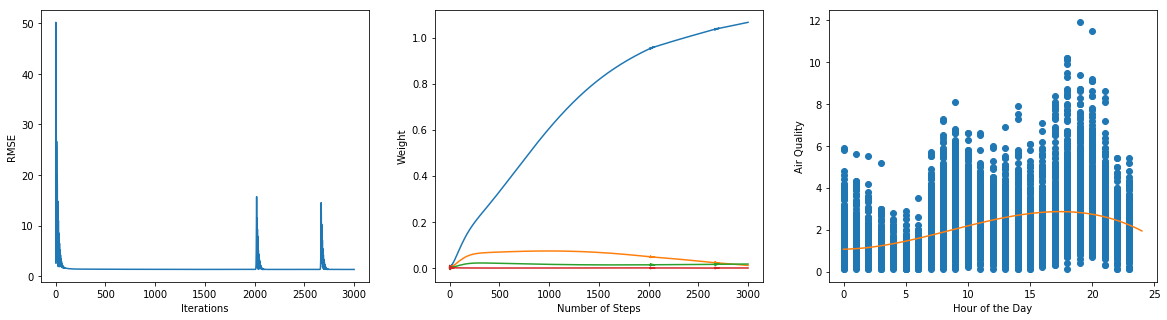

In [61]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence_best)
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.subplot(1, 3, 2)
plt.plot(W_sequence_best)
plt.xlabel("Number of Steps")
plt.ylabel("Weight")
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
plt.ylabel("Air Quality")
plt.xlabel("Hour of the Day")
xs = np.linspace(0, 24, 100).reshape(-1, 1)
plt.plot(xs, cubic_model(xs, W_best));

<h2>Cubic Model Discussion</h2>

The best learning rate value for the cubic model is 0.01 with a RMSE of 1.1489330924746517. The cubic model uses the same learning rate as the linear and quadratic model but has a lower RMSE because a cubic equation (double curved line) can fit the data more accuratly then a straight linear or single curved quadratic line. The likely reason the linear, quadratic, and cubic models share the best learning rate of 0.01 is because they have similarly scaled gradient descents with a low number of local minimums they could get stuck in. Training it on the highest learning rate (0.01) yields the bests results and using a lower learning rate probably results in the gradient descent being too slow and not able to reach the same minimum in the same number of steps.

Find Best Weights for the Quartic Model

In [62]:
error_quartic_best = 1000
for rho in rhoAry:
    W = np.zeros((5, 1))
    W, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W, rho, n_steps)
    print(np.sqrt(error_sequence[-1]))
    if(np.sqrt(error_sequence[-1]) < error_quartic_best):
        W_best = W
        error_sequence_best = error_sequence
        W_sequence_best = W_sequence
        rho_quartic_best = rho
        error_quartic_best = np.sqrt(error_sequence[-1])

print(f'The lowest RMSE is {error_quartic_best} for rho {rho_quartic_best} at step {n_steps}')

1.1707808016319932
1.1708956575722862
1.2639860482694656
1.2162729711495255
1.2406790392400402
1.4146175856522754
1.440297811091993
1.5569532333595262
1.6056752712484819
The lowest RMSE is 1.1707808016319932 for rho 0.01 at step 3000


Plot the Quartic Model Results

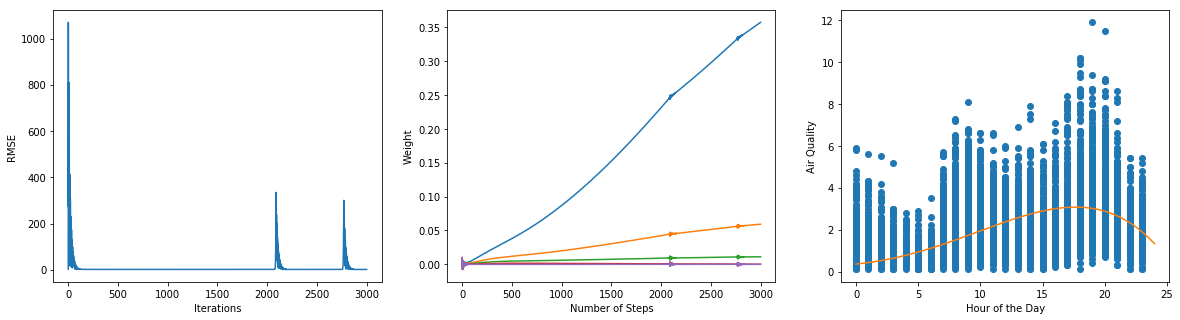

In [63]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence_best)
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.subplot(1, 3, 2)
plt.plot(W_sequence_best)
plt.xlabel("Number of Steps")
plt.ylabel("Weight")
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
plt.ylabel("Air Quality")
plt.xlabel("Hour of the Day")
xs = np.linspace(0, 24, 100).reshape(-1, 1)
plt.plot(xs, quartic_model(xs, W_best));

<h2>Quartic Model Discussion</h2>

The best learning rate value for the quartic model is 0.001 with a RMSE of 1.1708838115369375. The quartic model uses a lower learning rate than the linear, quadratic, and cubic models but has a higher RMSE probably because the learning rate of 0.01 is too high of a step (and overshoots the minimum) and the next step rate of 0.001 is low enough (to not overshoot the minimum) but doesn't have enough iterations to reach the minimum. The likely reason the quartic model has a higher learning rate of 0.001 than the linear, quadratic, and cubic models is because it has more local minimums or a less steep gradient descent.

<h1>Extra Credit</h1>

Linear Model Plus Sine

In [64]:
def linear_sine_model(X, W):
    return np.hstack((X, np.sin(X))) @ W[1:, :] + W[0, :]

Linear Model Plus Sine Gradient

In [65]:
def linear_sine_model_gradient(X, T, W):
    dEdY = -2 * (T - linear_sine_model(X, W))
    all_but_bias = np.hstack((X, np.sin(X)))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

Find Best Weights for the Linear Model Plus Sine

In [66]:
error_linear_sine_best = 1000
for rho in rhoAry:
    W = np.zeros((3, 1))
    W, error_sequence, W_sequence = gradient_descent_adam(linear_sine_model, linear_sine_model_gradient, rmse, X, T, W, rho, n_steps)
    print(np.sqrt(error_sequence[-1]))
    if(np.sqrt(error_sequence[-1]) < error_linear_sine_best):
        W_best = W
        error_sequence_best = error_sequence
        W_sequence_best = W_sequence
        rho_linear_sine_best = rho
        error_linear_sine_best = np.sqrt(error_sequence[-1])

print(f'The lowest RMSE is {error_linear_sine_best} for rho {rho_linear_sine_best} at step {n_steps}')

1.1614571617336993
1.1621779485717985
1.2033772083141505
1.5042940038099881
1.600485191028256
1.6104995281939416
1.6115041988910228
1.6116046976622165
1.6116147478556875
The lowest RMSE is 1.1614571617336993 for rho 0.01 at step 3000


Plot the Linear Model Plus Sine Results

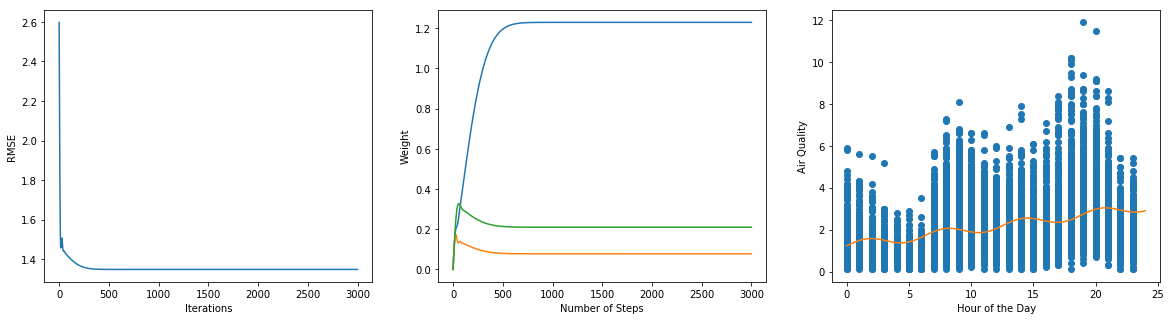

In [67]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence_best)
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.subplot(1, 3, 2)
plt.plot(W_sequence_best)
plt.xlabel("Number of Steps")
plt.ylabel("Weight")
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
plt.ylabel("Air Quality")
plt.xlabel("Hour of the Day")
xs = np.linspace(0, 24, 100).reshape(-1, 1)
plt.plot(xs, linear_sine_model(xs, W_best));

<h2>Linear Model Plus Sine Discussion</h2>

The best learning rate value for the linear model plus sine is 0.01 with a RMSE of 1.1614571617336993. The linear model plus sine performed better then the linear (1.1647985282595315) model but worse than the quadratic (1.1591889144427283) and cubic (1.1489330924746517) models. The reason for this is probably the linear model plus sine has one more weight than the linear model but having the weight attached to a sine function is less affective then attaching it to a squared function. The best learning rate (0.01) is the same as the linear, quadratic, and cubic best learning rates, this is likely due to having similarly scaled gradient descents with a low number of local minimums they could get stuck in. Training it on the highest learning rate (0.01) yields the bests results and using a lower learning rate probably results in the gradient descent being too slow and not able to reach the same minimum in the same number of steps.

In [68]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Armstrong-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2]).reshape(-1, 1)
  Y = linear_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3]).reshape(-1, 1)
  Y = quadratic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5).reshape(-1, 1)
  Y = cubic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5, 0.3]).reshape(-1, 1)
  Y = quartic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2

<Figure size 432x288 with 0 Axes>